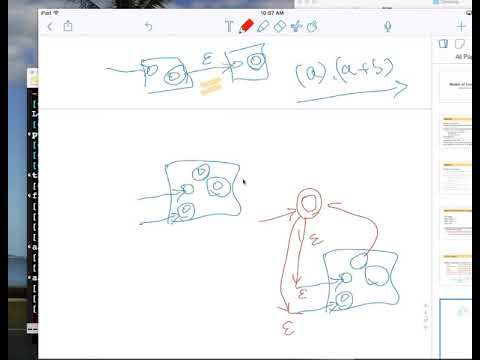

In [1]:
# This Youtube video walks through this notebook
from IPython.display import YouTubeVideo
YouTubeVideo('L6l3c17mpi4')

# All chapters till Ch10 coming to play in Jove

In [2]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path

from jove.DotBashers import *
from jove.Def_md2mc import *
from jove.Def_NFA   import *
from jove.Def_DFA   import *
from jove.Def_RE2NFA    import *
from jove.Def_NFA2RE    import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

# Postage Stamp Problem solved using RE and min_dfa

The postage-stamp problem tries to answer the following question (typically posed wrt two postage stamp denominations that are relatively prime)

* Given an unlimited supply of x cent stamps and an unlimited supply of y cent stamps

  - where x and y are relatively prime
  
* Find out the largest denomination that you CANNOT make

* E.g., given 3 cent and 5 cent stamps (x=3, y=5)

  - Check they are relatively prime
  
    * Their GCD must be 1
    
  - Check!
  
* What is the largest postage that CANNOT be made using just 3 and 5 cents?

* Approaches:

  - Trial and error
  
    * 0, 3, 3+3, 3+5, 5+3, 5+5, 5+5+3, ...
    
  - Traditional math books:
  
    * Use Sylvester's theorem to find the Frobenius number
    
  - What I observed about a decade ago (have checked with a few experts and while it is   "out there in the air", nobody had seen it written down...)
  
    * We can use minimal DFA!

    * My approach easily extends to more than two stamps!
    
  - General problem is hard, but has beautiful complexity-theory connections
  
* Onto solving!

## Related Problem: McNugget problem (McNugget Number).
A McNugget number is a positive integer that can be obtained by adding together orders of McDonald's® Chicken McNuggetsTM (prior to consuming any), which originally came in boxes of 6, 9, and 20 (Vardi 1991, pp. 19-20 and 233-234; Wah and Picciotto 1994, p. 186).

__We can find the McNugget Number also using my method !! __

We will do this after solving the postage stamp problem

The numbers are not relatively prime

You will observe something cool when you approach the McNugget problem using REs !!

## Let us solve the Postage Stamp Problem!

In [3]:
p35 = "(aaa+aaaaa)*"

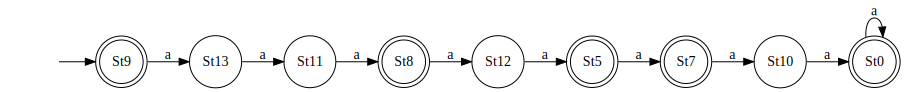

In [4]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(p35))))

In [5]:
p57 = "(aaaaa+aaaaaaa)*"

In [6]:
d57 = min_dfa(nfa2dfa(re2nfa(p57)))

In [7]:
len(d57["Q"])

25

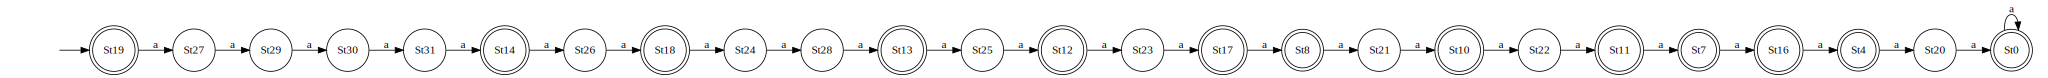

In [8]:
dotObj_dfa(d57)

In [9]:
p36 = "(aaa+aaaaaa)*"

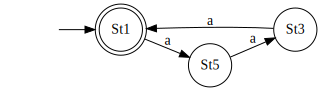

In [10]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(p36))))

In [11]:
Eq01 = md2mc('''
DFA
IF : 0 -> F1
IF : 1 -> F2
F1 : 0 -> F1
F2 : 1 -> F2
F1 : 1 -> S01
F2 : 0 -> S10
S01 : 1 -> S01
S10 : 0 -> S10
S01 : 0 -> Fa1
S10 : 1 -> Fa2
Fa1 : 0 -> F1
Fa1 : 1 -> S01
Fa2 : 1 -> F2
Fa2 : 0 -> S10
''')

Generating LALR tables


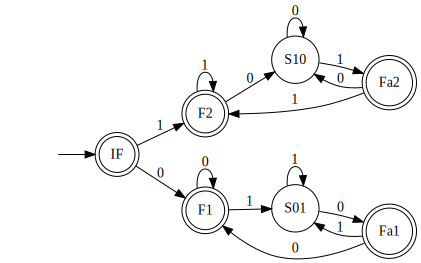

In [12]:
dotObj_dfa(Eq01)

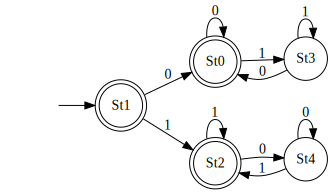

In [13]:
dotObj_dfa(nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(Eq01)))))

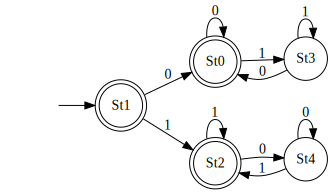

In [14]:
dotObj_dfa(min_dfa_brz(Eq01))

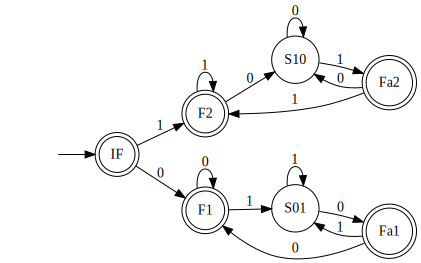

In [15]:
dotObj_dfa(Eq01)

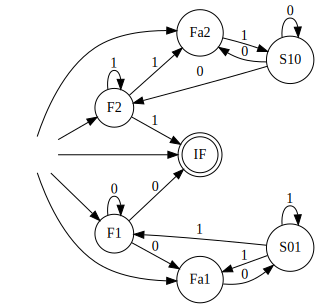

In [16]:
dotObj_nfa(rev_dfa(Eq01))

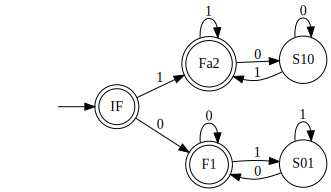

In [17]:
dotObj_dfa(min_dfa(Eq01))

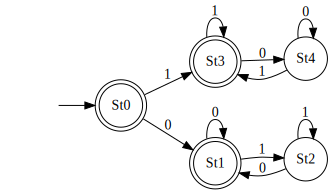

In [18]:
dotObj_dfa(nfa2dfa(rev_dfa(Eq01)))

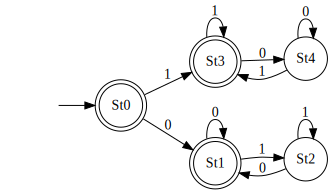

In [19]:
dotObj_dfa(nfa2dfa(rev_dfa(Eq01)))

In [20]:
(G, DO, RE) = del_gnfa_states(mk_gnfa(dfa2nfa(Eq01)))

**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state S10 ****
**** Eliminating state Fa1 ****
**** Eliminating state S01 ****
**** Eliminating state IF ****
**** Eliminating state Fa2 ****


In [21]:
RE

'(((((1 ((1)* 0)) ((0)* 1)) ((((((1 ((1)* 0)) + 0) + 0) ((0)* 1)))* (((1 (1)*) + "") + ""))) + ((((0 ((0)* 1)) (((((0 (((0 ((0)* 1)) + 1) + 1)) + 1) + 1))* (0 (((0 (0)*) + "") + "")))) + (((0 (0)*) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + ""))) + (((0 (0)*) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + "")))) + ((((0 ((0)* 1)) (((((0 (((0 ((0)* 1)) + 1) + 1)) + 1) + 1))* (0 (((0 (0)*) + "") + "")))) + (((0 (0)*) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + ""))) + (((0 (0)*) + (((1 (1)*) + "") + "")) + (((1 (1)*) + "") + ""))))'

## The book tells you why nfa2re can produce exp. sized RE

# How can I believe that this RE is correct?

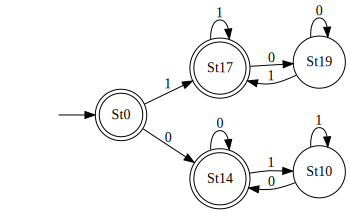

In [22]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

In [23]:
rev_dfa

<function jove.Def_NFA.rev_dfa>

In [24]:
help(rev_dfa)

Help on function rev_dfa in module jove.Def_NFA:

rev_dfa(D)
    In : D = a partially consistent DFA without any unreachable states.
    Out: A consistent NFA whose language is D's language reversed.



In [25]:
Eq01

{'Delta': {('F1', '0'): 'F1',
  ('F1', '1'): 'S01',
  ('F2', '0'): 'S10',
  ('F2', '1'): 'F2',
  ('Fa1', '0'): 'F1',
  ('Fa1', '1'): 'S01',
  ('Fa2', '0'): 'S10',
  ('Fa2', '1'): 'F2',
  ('IF', '0'): 'F1',
  ('IF', '1'): 'F2',
  ('S01', '0'): 'Fa1',
  ('S01', '1'): 'S01',
  ('S10', '0'): 'S10',
  ('S10', '1'): 'Fa2'},
 'F': {'F1', 'F2', 'Fa1', 'Fa2', 'IF'},
 'Q': {'F1', 'F2', 'Fa1', 'Fa2', 'IF', 'S01', 'S10'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

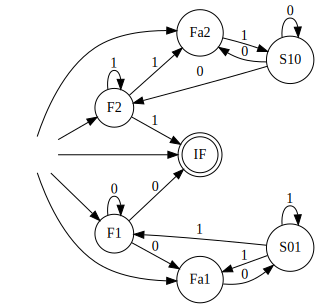

In [26]:
dotObj_nfa(rev_dfa(Eq01))

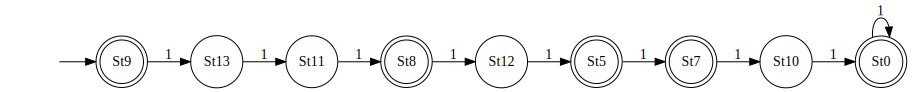

In [27]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa("(111+11111)*"))))

In [28]:
RE_lhs = "0*+0*1(''+00*1)*000*"

In [29]:
RE_rhs =  "''+(0+10)*0"

# How to ensure that these REs are equivalent?

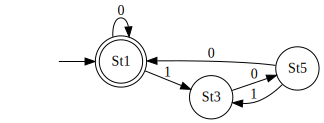

In [30]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE_lhs))))

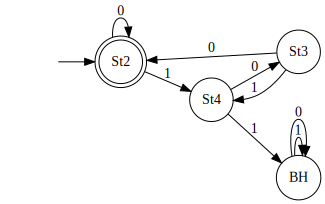

In [31]:
dotObj_dfa_w_bh(min_dfa(nfa2dfa(re2nfa(RE_rhs))))

# For fun, convert RE_lhs and RE_rhs back to RE via re2nfa and nfa2re

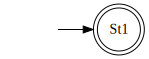

In [32]:
dotObj_nfa(re2nfa("''"))

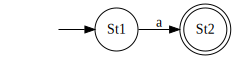

In [33]:
dotObj_nfa(re2nfa("a"))

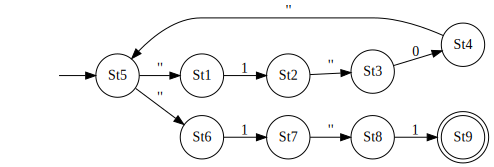

In [34]:
dotObj_nfa(re2nfa("  (10)* (11)  "))

In [35]:
re2nfa("  (10)* (11)  ")

{'Delta': {('St1', '1'): {'St2'},
  ('St2', ''): {'St3'},
  ('St3', '0'): {'St4'},
  ('St4', ''): {'St5'},
  ('St5', ''): {'St1', 'St6'},
  ('St6', '1'): {'St7'},
  ('St7', ''): {'St8'},
  ('St8', '1'): {'St9'}},
 'F': {'St9'},
 'Q': {'St1', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7', 'St8', 'St9'},
 'Q0': {'St5'},
 'Sigma': {'0', '1'}}

In [36]:
NFA1 = re2nfa("   (a+b+c)(p+q)*(m+n) " )

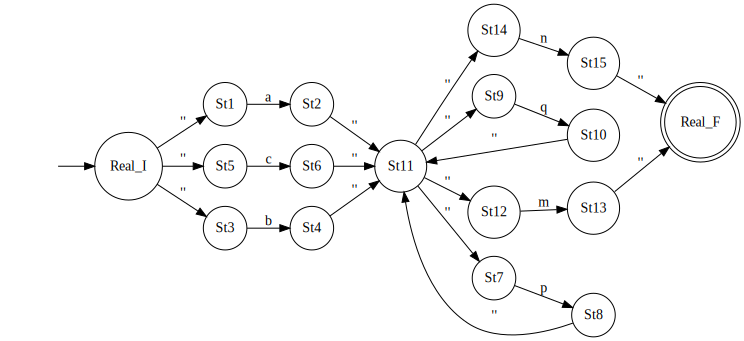

In [37]:
dotObj_nfa(mk_gnfa(NFA1))

In [38]:
GNFA1 = mk_gnfa(NFA1)

In [39]:
(Gnfa_fina, DO, REfinal) = del_gnfa_states(GNFA1)

**** Eliminating state St10 ****
**** Eliminating state St7 ****
**** Eliminating state St13 ****
**** Eliminating state St14 ****
**** Eliminating state St4 ****
**** Eliminating state St1 ****
**** Eliminating state St6 ****
**** Eliminating state St5 ****
**** Eliminating state St9 ****
**** Eliminating state St8 ****
**** Eliminating state St12 ****
**** Eliminating state St3 ****
**** Eliminating state St15 ****
**** Eliminating state St11 ****
**** Eliminating state St2 ****


In [40]:
REfinal

'(((a ((((p + q) + q))* ((n + m) + m))) + (((b + c) + c) ((((p + q) + q))* ((n + m) + m)))) + (((b + c) + c) ((((p + q) + q))* ((n + m) + m))))'

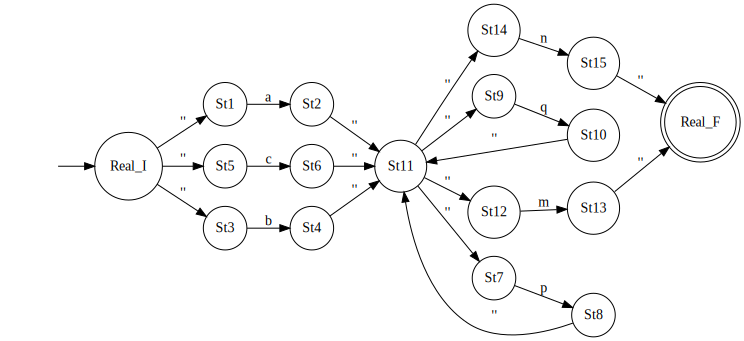

In [41]:
DO[0]

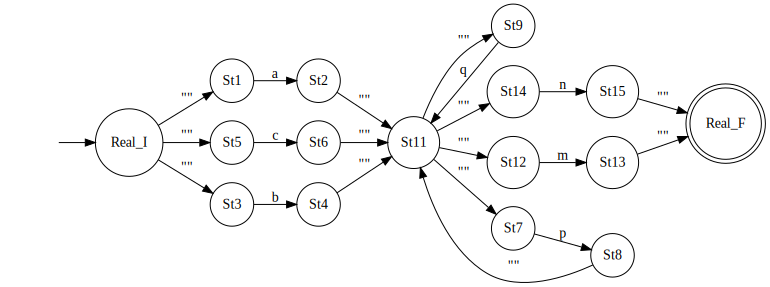

In [42]:
DO[1]

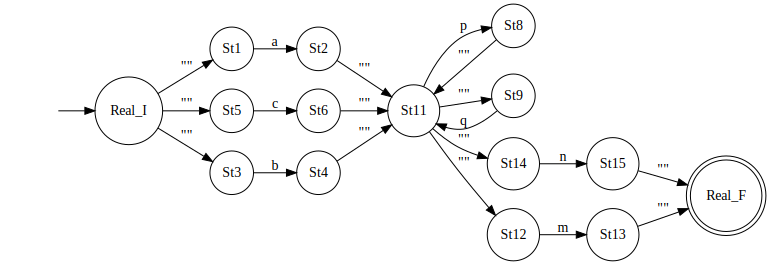

In [43]:
DO[2]

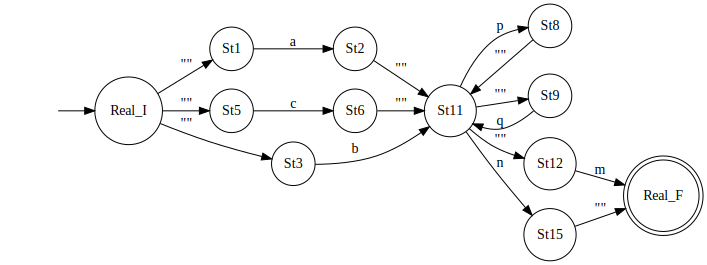

In [44]:
DO[5]

In [45]:
len(DO)

16

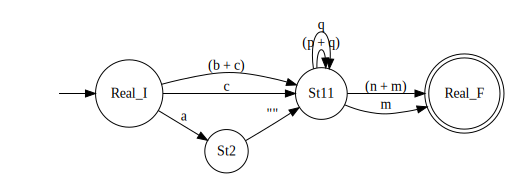

In [46]:
DO[13]

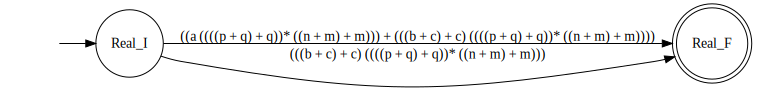

In [47]:
DO[15]

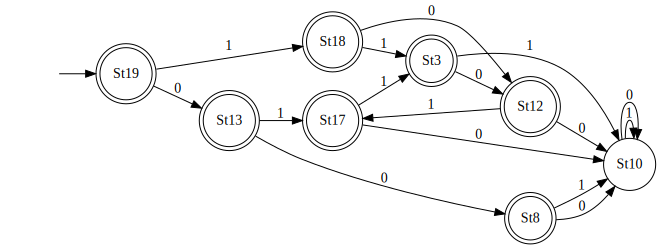

In [48]:
dotObj_dfa(comp_dfa(min_dfa(nfa2dfa(re2nfa(" (1+0)*(111+000+100+010+001)(1+0)* ")))))

An NFA is a machine $(Q, \Sigma, \delta, Q_0, F)$ which is somewhat like a DFA 
except that 

1. It can start from a __set__ of starting states $Q_0$
    > i.e., the NFA can start from more than one starting state
    
2. Its transition function $\delta$ maps $Q\times (\Sigma\cup \{\varepsilon\})$ to $2^{Q}$
    > i.e., the NFA takes a state $Q$ and a symbol and returns a set of states
    
You can see these aspects being illustrated in the NFA to follow

# RE to NFA

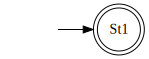

In [49]:
dotObj_nfa(re2nfa("''"))

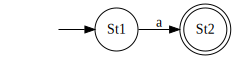

In [50]:
dotObj_nfa(re2nfa("a"))

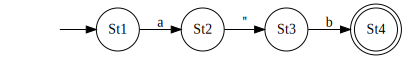

In [51]:
dotObj_nfa(re2nfa("ab"))

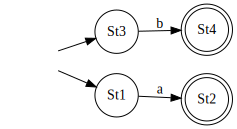

In [52]:
dotObj_nfa(re2nfa("a+b"))

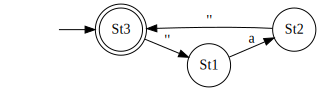

In [53]:
dotObj_nfa(re2nfa("a*"))

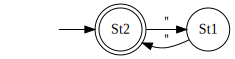

In [54]:
dotObj_nfa(re2nfa("''*"))

In [55]:
nfromr = re2nfa("ab(a+b)*")

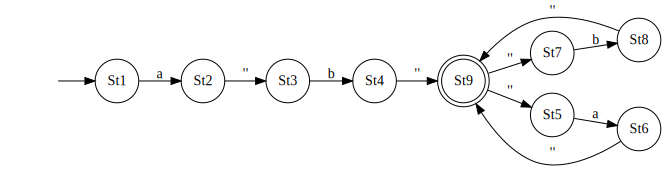

In [56]:
dotObj_nfa(nfromr)

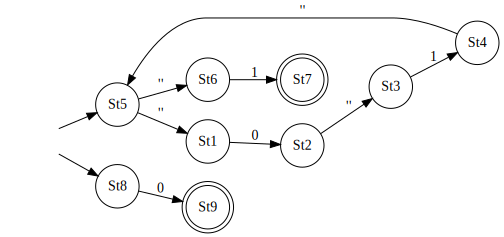

In [57]:
dotObj_nfa(re2nfa("(01)*1+0"))

# NFA to RE

In [58]:
mk_gnfa

<function jove.Def_NFA2RE.mk_gnfa>

In [59]:
help(mk_gnfa)

Help on function mk_gnfa in module jove.Def_NFA2RE:

mk_gnfa(Nin)
    Input : Nin, an NFA.
    Output: G, a GNFA, with at-most one transition from any
            state p to a state q.??true any more?? Note that we have created
            an NFA (G+NFA), and so one state can have a transition
            to A SET OF STATES !!
    Method: Add a new set of states {Real_I} and another, {Real_F}.
            Move from state Real_I to the NFA's initial set of states
            upon epsilon, and from each state in NFA's F to Real_F.
            Return this GNFA.
            We will keep GNFA's alphabet implicit (whatever edge
            labels exist will be deemed to be in the alphabet.)



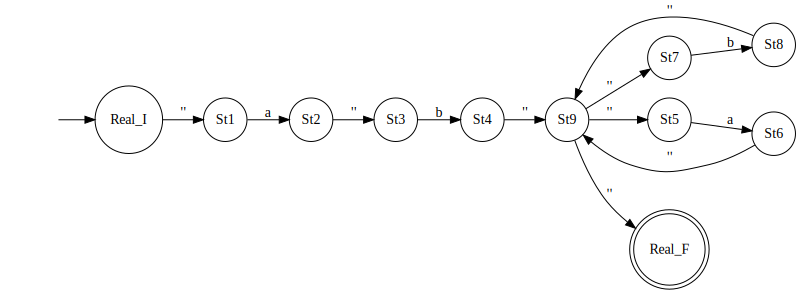

In [60]:
gnfromr = mk_gnfa(nfromr)
dotObj_gnfa(gnfromr)

In [61]:
del_gnfa_states

<function jove.Def_NFA2RE.del_gnfa_states>

In [62]:
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



In [63]:
(Gf, DO, RE) = del_gnfa_states(gnfromr)

**** Eliminating state St7 ****
**** Eliminating state St4 ****
**** Eliminating state St1 ****
**** Eliminating state St6 ****
**** Eliminating state St5 ****
**** Eliminating state St8 ****
**** Eliminating state St9 ****
**** Eliminating state St3 ****
**** Eliminating state St2 ****


In [64]:
RE

'(a (b (((b + a) + a))*))'

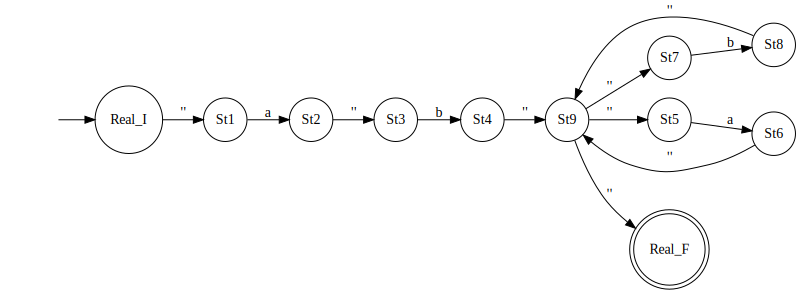

In [65]:
DO[0]

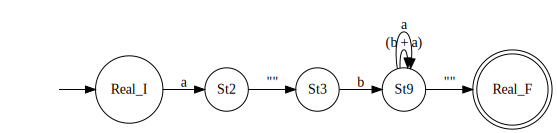

In [66]:
DO[6]

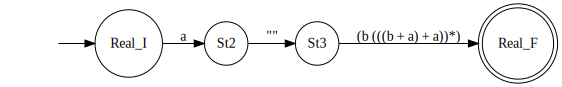

In [67]:
DO[7]

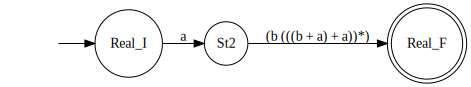

In [68]:
DO[8]

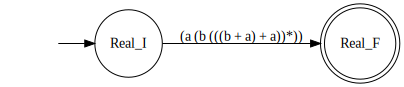

In [69]:
DO[9]

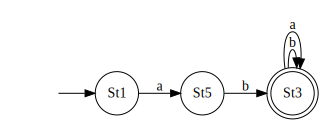

In [70]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(RE))))

In [71]:
min_dfa

<function jove.Def_DFA.min_dfa>

In [72]:
min_dfa_brz

<function jove.Def_NFA.min_dfa_brz>